In [1]:
from nltk.parse import RecursiveDescentParser
from nltk import Nonterminal, nonterminals, Production, CFG
from nltk import Tree
from IPython.display import display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
import os
import svgling

In [4]:
grammar1 = CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")

In [5]:
grammar2 = CFG.fromstring("""
S -> NP VP
NP -> Det Nom | PropN
Nom -> Adj Nom | N
VP -> V Adj | V NP | V S | V NP PP
PP -> P NP
PropN -> "Buster" | "Chatterer" | "Joe"
Det -> "the" | "a"
N -> "bear" | "squirrel" | "tree" | "fish"
Adj -> "angry" | "frightened" | "little" | "tall"
V -> "chased" | "said" | "thought" | "was" | "put"
P -> "on"
""") 

In [6]:
rd1 = RecursiveDescentParser(grammar1)
rd2 = RecursiveDescentParser(grammar2)

In [7]:
sentence1 = 'John saw a man in the park'.split()

for t in rd1.parse(sentence1):
    print(t)

(S
  (NP John)
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP John)
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


In [8]:
sentence2 = 'Joe chased a frightened squirrel'.split()
for t in rd2.parse(sentence2):
    print(t)

(S
  (NP (PropN Joe))
  (VP
    (V chased)
    (NP (Det a) (Nom (Adj frightened) (Nom (N squirrel))))))


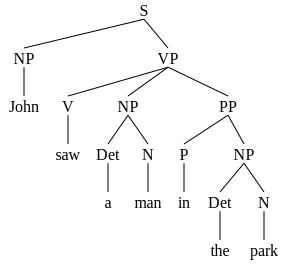

In [6]:
t = Tree.fromstring('(S (NP John) (VP (V saw) (NP (Det a) (N man)) (PP (P in) (NP (Det the) (N park)))))')
svgling.draw_tree(t)

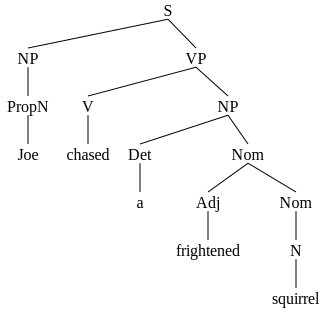

In [7]:
t2 = Tree.fromstring('(S (NP (PropN Joe)) (VP (V chased) (NP (Det a) (Nom (Adj frightened) (Nom (N squirrel))))))')
svgling.draw_tree(t2)